In [125]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [7]:
grad_data = ('/Users/jasonpaik9/Documents/Thinkful/Bootcamp/Unit 3/admission_grad_data.csv')

In [60]:
data = pd.read_csv(grad_data)
## The parameters included are : 1. GRE Scores ( out of 340 )
## 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 
## 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
## 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 )
## 7. Chance of Admit ( ranging from 0 to 1 )
data.columns = ['SerialNo','GREScore','TOEFLScore','UnivRating','SOP','LOR',
                'CumulativeGPA','Research','ChanceofAdmit']

In [16]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [61]:
data.head()

,SerialNo,GREScore,TOEFLScore,UnivRating,SOP,LOR,CumulativeGPA,Research,ChanceofAdmit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [62]:
## Linear regression model between three variables that might best explain ChanceofAdmit
## These three variables might best explain ChanceofAdmit - adding more coefficients will
## increase the model's strength - how do you trim it?
regr = linear_model.LinearRegression()
Y = data['ChanceofAdmit'].values.reshape(-1, 1)
X = data[['GREScore','TOEFLScore','UnivRating','SOP','LOR','CumulativeGPA','Research']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.00185851 0.00277797 0.00594137 0.00158614 0.01685874 0.11838505
  0.02430748]]

Intercept: 
 [-1.27572508]

R-squared:
0.8219007395178417


In [128]:
regr = linear_model.LinearRegression()
Y = data['ChanceofAdmit'].values.reshape(-1, 1)
X = data[['GREScore','LOR','CumulativeGPA']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.0032165  0.02140445 0.13543319]]

Intercept: 
 [-1.53230123]

R-squared:
0.81128117778268


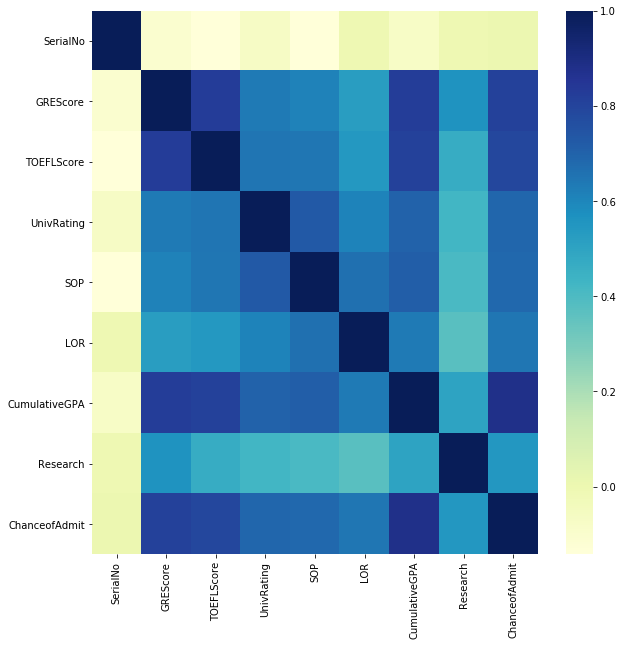

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap="YlGnBu")

In [74]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

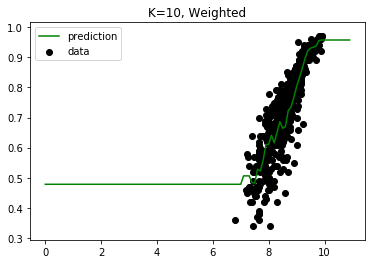

Unweighted Accuracy: 0.77 (+/- 0.14)
Weighted Accuracy: 0.73 (+/- 0.14)


In [121]:
## KNN algorithm to predict the model with 
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
x_knn = data[['CumulativeGPA']]
y_knn = data.ChanceofAdmit
knn.fit(x_knn,y_knn)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
x1_knn = data[['CumulativeGPA']]
y1_knn = data.ChanceofAdmit
knn_w.fit(X, Y)

T = np.arange(0, 11, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

plt.scatter(x_knn, y_knn, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x_knn, y_knn, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, x1_knn, y1_knn, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

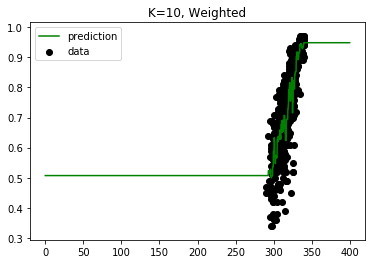

Unweighted Accuracy: 0.60 (+/- 0.15)
Weighted Accuracy: 0.60 (+/- 0.15)


In [129]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
x_knn = data[['GREScore']]
y_knn = data.ChanceofAdmit
knn.fit(x_knn,y_knn)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
x1_knn = data[['GREScore']]
y1_knn = data.ChanceofAdmit
knn_w.fit(X, Y)

T = np.arange(0, 400, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

plt.scatter(x_knn, y_knn, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x_knn, y_knn, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, x1_knn, y1_knn, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

## Regression Model Comparison Write Up

##### Introduction

I used a dataset found on Kaggle prepared by UCLA graduate admissions data that had data ranging between test scores, letters of recommendation, personal statements, undergraduate GPA, and other variables that go into consideration for admittance. What was interesting is that the dataset did not provide a binary scale as to whether the student who applied got in and the **ChanceofAdmit** is just the personal confidence the applicant had when they had their respective scores for applying to this school. I used this as Y-variable, despite it not being the actual fact whether they got in or not, because this variable should in large part tell me what the applicant's confidence was regardless of whether they got in or not. I am under the assumption of good faith an applicant should know where they stand in getting in and moreso I could use the model I created as a baseline understanding of how others stacked up if I had the same metrics to plug my own values in.

##### Writeup

When you consider what both the multi-variate regression and the KNN regression brings, there are interesting things that both can give. Multi-variate regression gives me a multiple number of variables that I can bring to consider into the equation that have different coefficient weights that might explain for the variance. I first stacked all the variables into one equation but saw that the R-squared value only changed by a percentage when I tailored it to three variables (filtered this through a correlation heat map to see which three had the highest). This tells me that most of the other variables were just extra fillers and my linear regression model kept its accuracy without compromising too much.

For the KNN-classification model, I did not have a classifier variable that would've told me whether the applicant got into the school or not (1 or 0 for admitted/rejected). What I did use was the regression model in seeing what one variable could have affected the **ChanceofAdmit** variable the most and created a model that best predicted, by weight, what type of weight the CumulativeGPA had on this Y-variable. It told me exact breakpoints as to what Chances of Admittance confidence scores elevated at so the model showed me in exact detail as to what type of score I would need for a certain admittance level.

I think both models have strengths in their own ways. I think the multi-variate regression model shows in large part, if I had the data, what my **ChanceofAdmit** score could roughly be on a holistic level. It can show me where I can level my confidence at on a realistic level in a compared pool amongst other applicants who are trying to achieve the same thing. But my KNN-regression model shows me in a lot of ways what specific scores give breaks in the levels of confidence. Does my cumulative GPA give me a confidence in the 80th percentile? What about my GRE Score? I think in certain ways where you feel like some scores have more importance than others, you can see where you individually have strengths and weaknesses in to further flesh out your model. I think both are strong but I would use the KNN-regression model to see how my individual scores stacked up. I think in a lot of ways this shows you a deeper detail as to what is relevant to you.